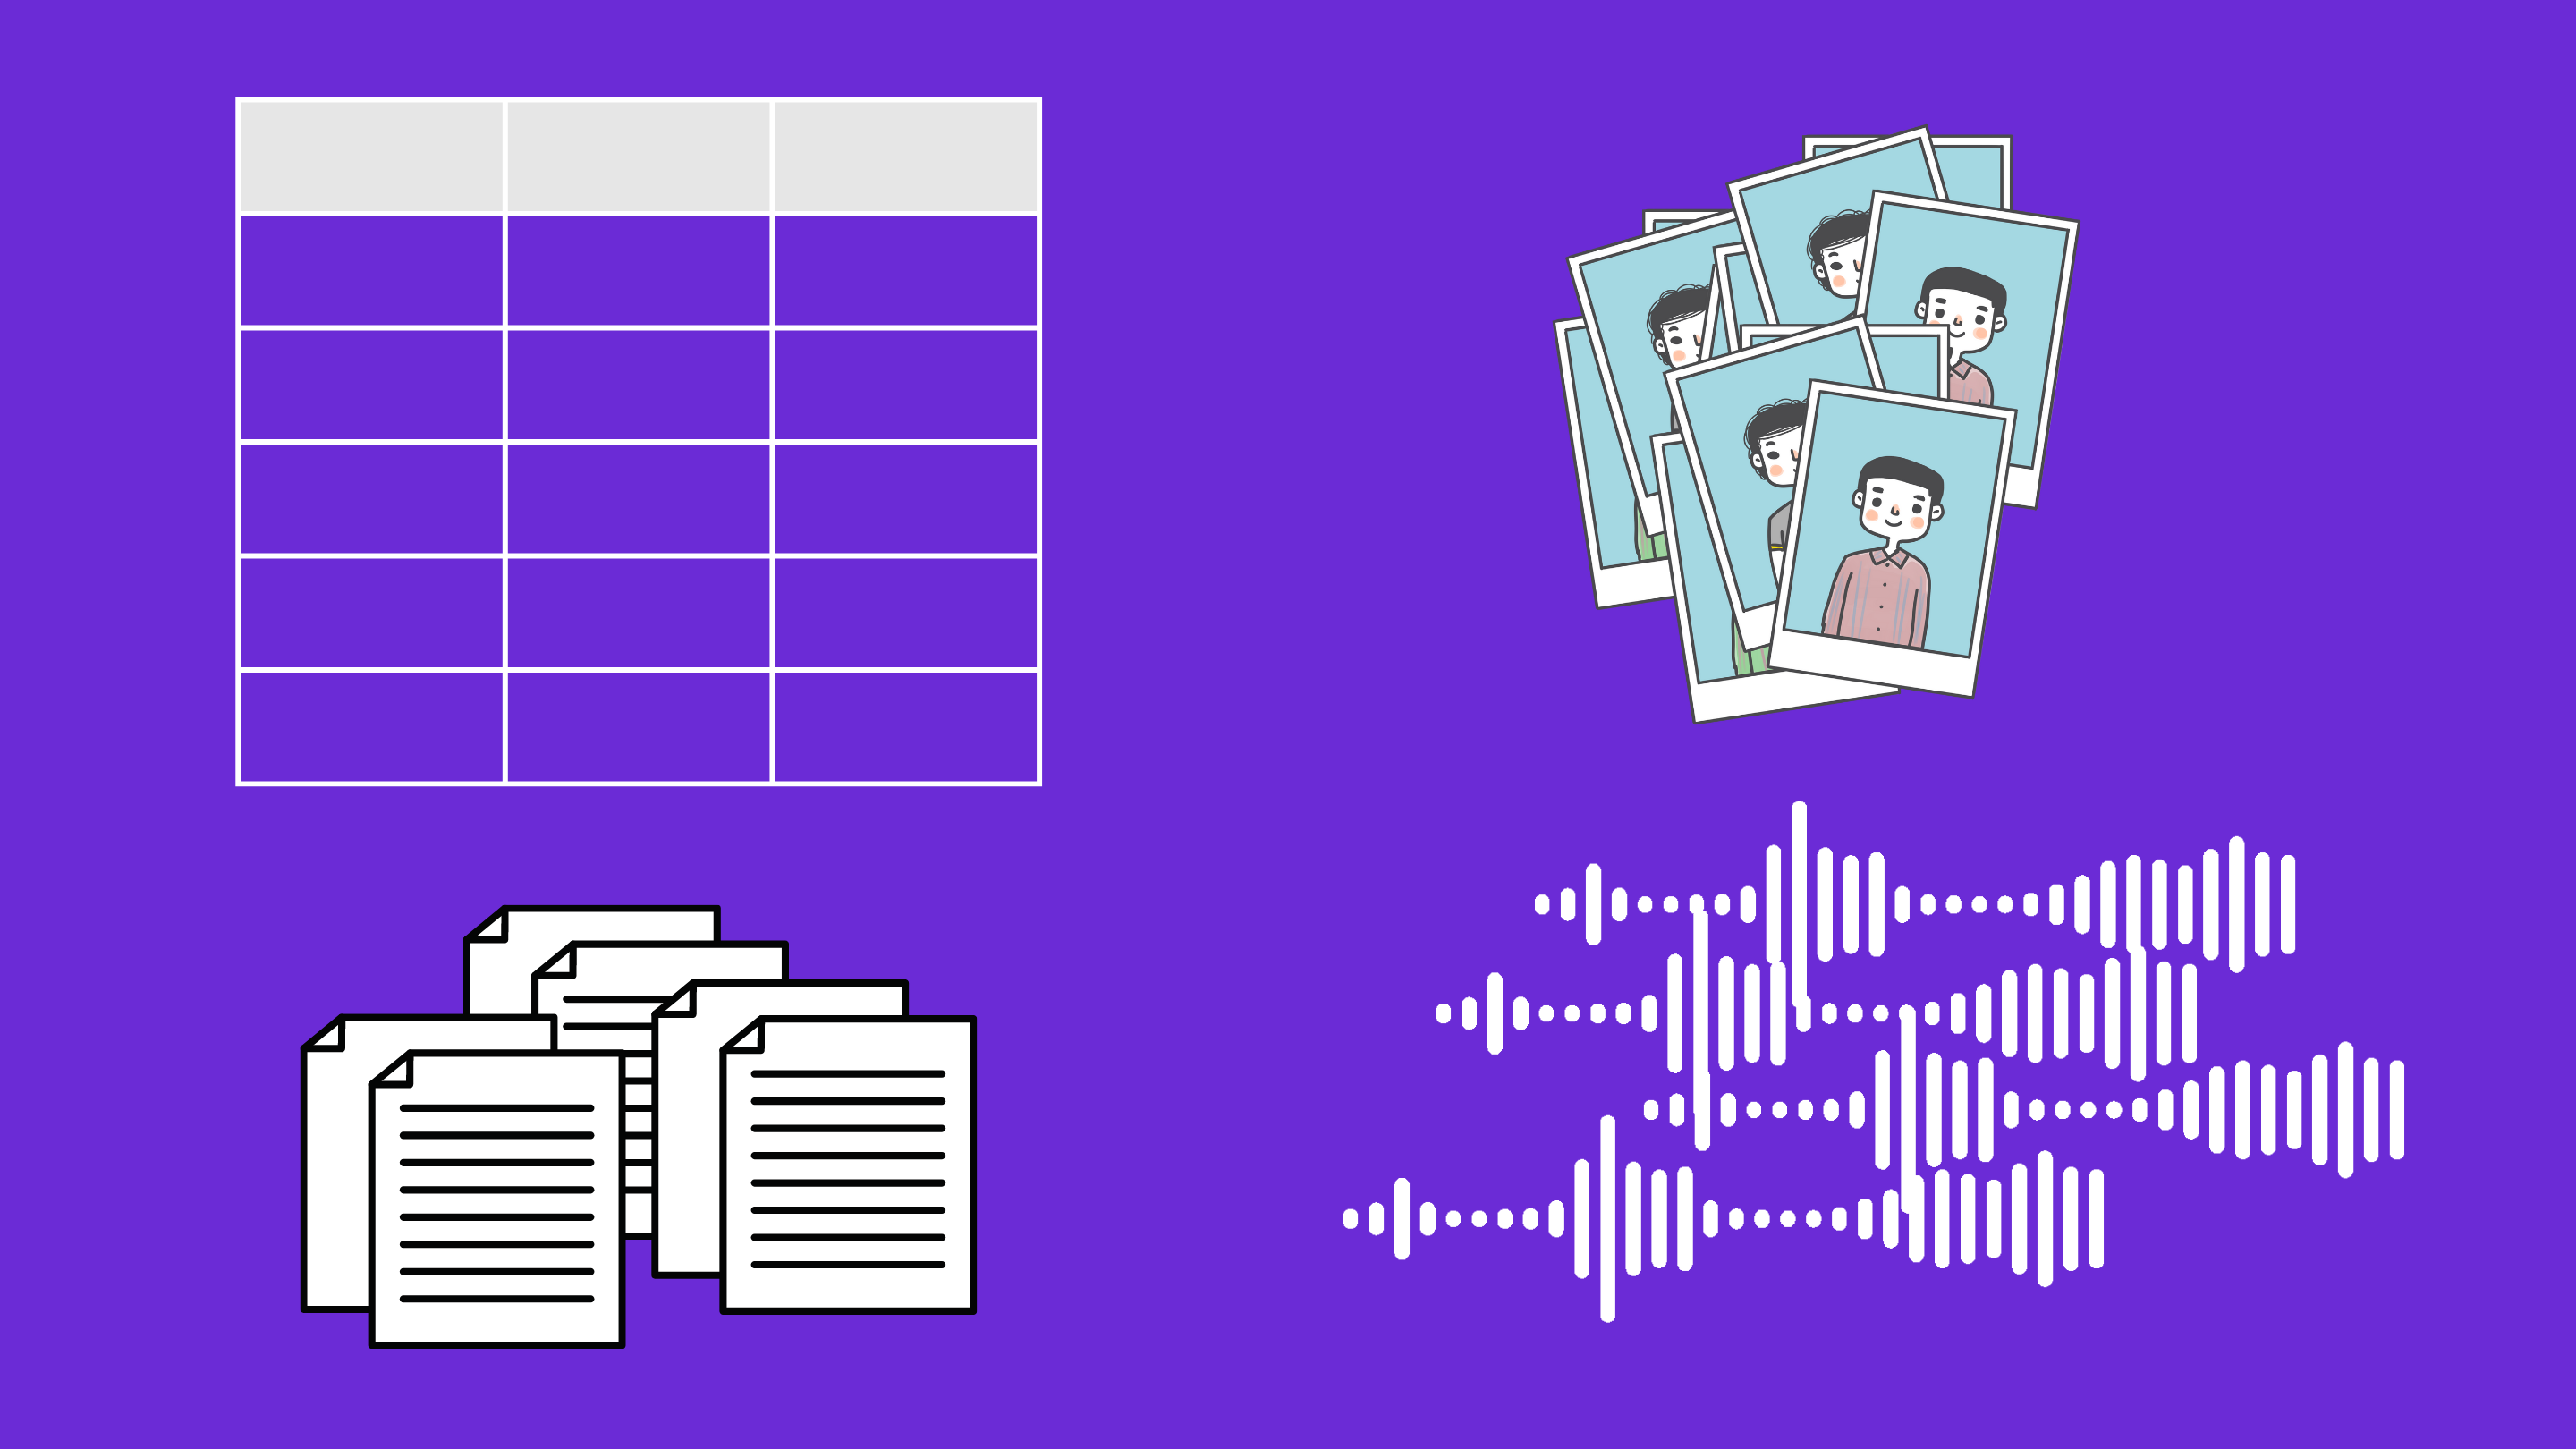

# Take a look at your data

First and foremost, it is important to understand what your data looks like, what kind of columns are involved and how is the data organized.

Some datasets have self explanatory columns but some might have confusing column names or abbreviations. 

## Tip #1 - Make sure to check the dataset documentation to understand the data.

Find the documentation for your dataset online.
* https://www.kaggle.com/datasets/usdot/flight-delays?resource=download&select=flights.csv
* maybe a PDF

OR

If it is a private dataset, you need to talk to whoever is responsible.


In some cases, if you are working in a company, you might need to interview people responsible for this piece of data to understand:
* how the data was collected
* what potential issues are there in the data
* what each column means
* what does the shorthands/category names stand for

# Importing libraries
In Python, you need to import the libraries you will use on this project before you use them in your code.

How to call the library will change for every library. Check their documentation to find the correct way.

You can also use this cell to set some preferences, like we do here, show all columns and rows of a dataset.

In [1]:
import pandas as pd
import numpy as np

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
flights = pd.read_csv('flights_sampled.csv', na_values=['-'])

/var/folders/jr/32l9cs714d55jcgynscvfm440000gn/T/ipykernel_2051/1331925317.py:1: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('flights_sampled.csv', na_values=['-'])


In [3]:
flights.shape

(1417918, 31)

In [4]:
flights.head(10)

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,TAIL_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,TAXI_OUT,WHEELS_OFF,SCHEDULED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,WHEELS_ON,TAXI_IN,SCHEDULED_ARRIVAL,ARRIVAL_TIME,ARRIVAL_DELAY,DIVERTED,CANCELLED,CANCELLATION_REASON,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY
0,2015,1,1,4,DL,1173,N826DN,LAS,ATL,30,33.0,3.0,12.0,45.0,221.0,203.0,186.0,1747,651.0,5.0,711,656.0,-15.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
1,2015,1,1,4,NK,597,N528NK,MSP,FLL,115,127.0,12.0,14.0,141.0,207.0,220.0,166.0,1487,527.0,40.0,542,607.0,25.0,0,0,NaN,25.0,0.0,0.0,0.0,0.0
2,2015,1,1,4,US,413,N571UW,LAS,CLT,120,110.0,-10.0,12.0,122.0,245.0,224.0,205.0,1916,747.0,7.0,825,754.0,-31.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
3,2015,1,1,4,NK,168,N629NK,PHX,ORD,125,237.0,72.0,9.0,246.0,204.0,175.0,156.0,1440,622.0,10.0,549,632.0,43.0,0,0,NaN,43.0,0.0,0.0,0.0,0.0
4,2015,1,1,4,AS,136,N431AS,ANC,SEA,135,NaN,NaN,NaN,NaN,205.0,NaN,NaN,1448,NaN,NaN,600,NaN,NaN,0,1,A,NaN,NaN,NaN,NaN,NaN
5,2015,1,1,4,NK,298,N514NK,LAS,IAH,144,140.0,-4.0,10.0,150.0,170.0,170.0,148.0,1222,618.0,12.0,634,630.0,-4.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
6,2015,1,1,4,HA,17,N389HA,LAS,HNL,145,145.0,0.0,16.0,201.0,370.0,385.0,361.0,2762,602.0,8.0,555,610.0,15.0,0,0,NaN,0.0,0.0,15.0,0.0,0.0
7,2015,1,1,4,US,617,N804AW,ANC,PHX,152,143.0,-9.0,21.0,204.0,323.0,322.0,298.0,2552,902.0,3.0,915,905.0,-10.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
8,2015,1,1,4,AS,114,N303AS,ANC,SEA,220,209.0,-11.0,15.0,224.0,200.0,199.0,176.0,1448,620.0,8.0,640,628.0,-12.0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
9,2015,1,1,4,B6,1030,N239JB,BQN,MCO,307,304.0,-3.0,25.0,329.0,173.0,196.0,160.0,1129,509.0,11.0,500,520.0,20.0,0,0,NaN,20.0,0.0,0.0,0.0,0.0


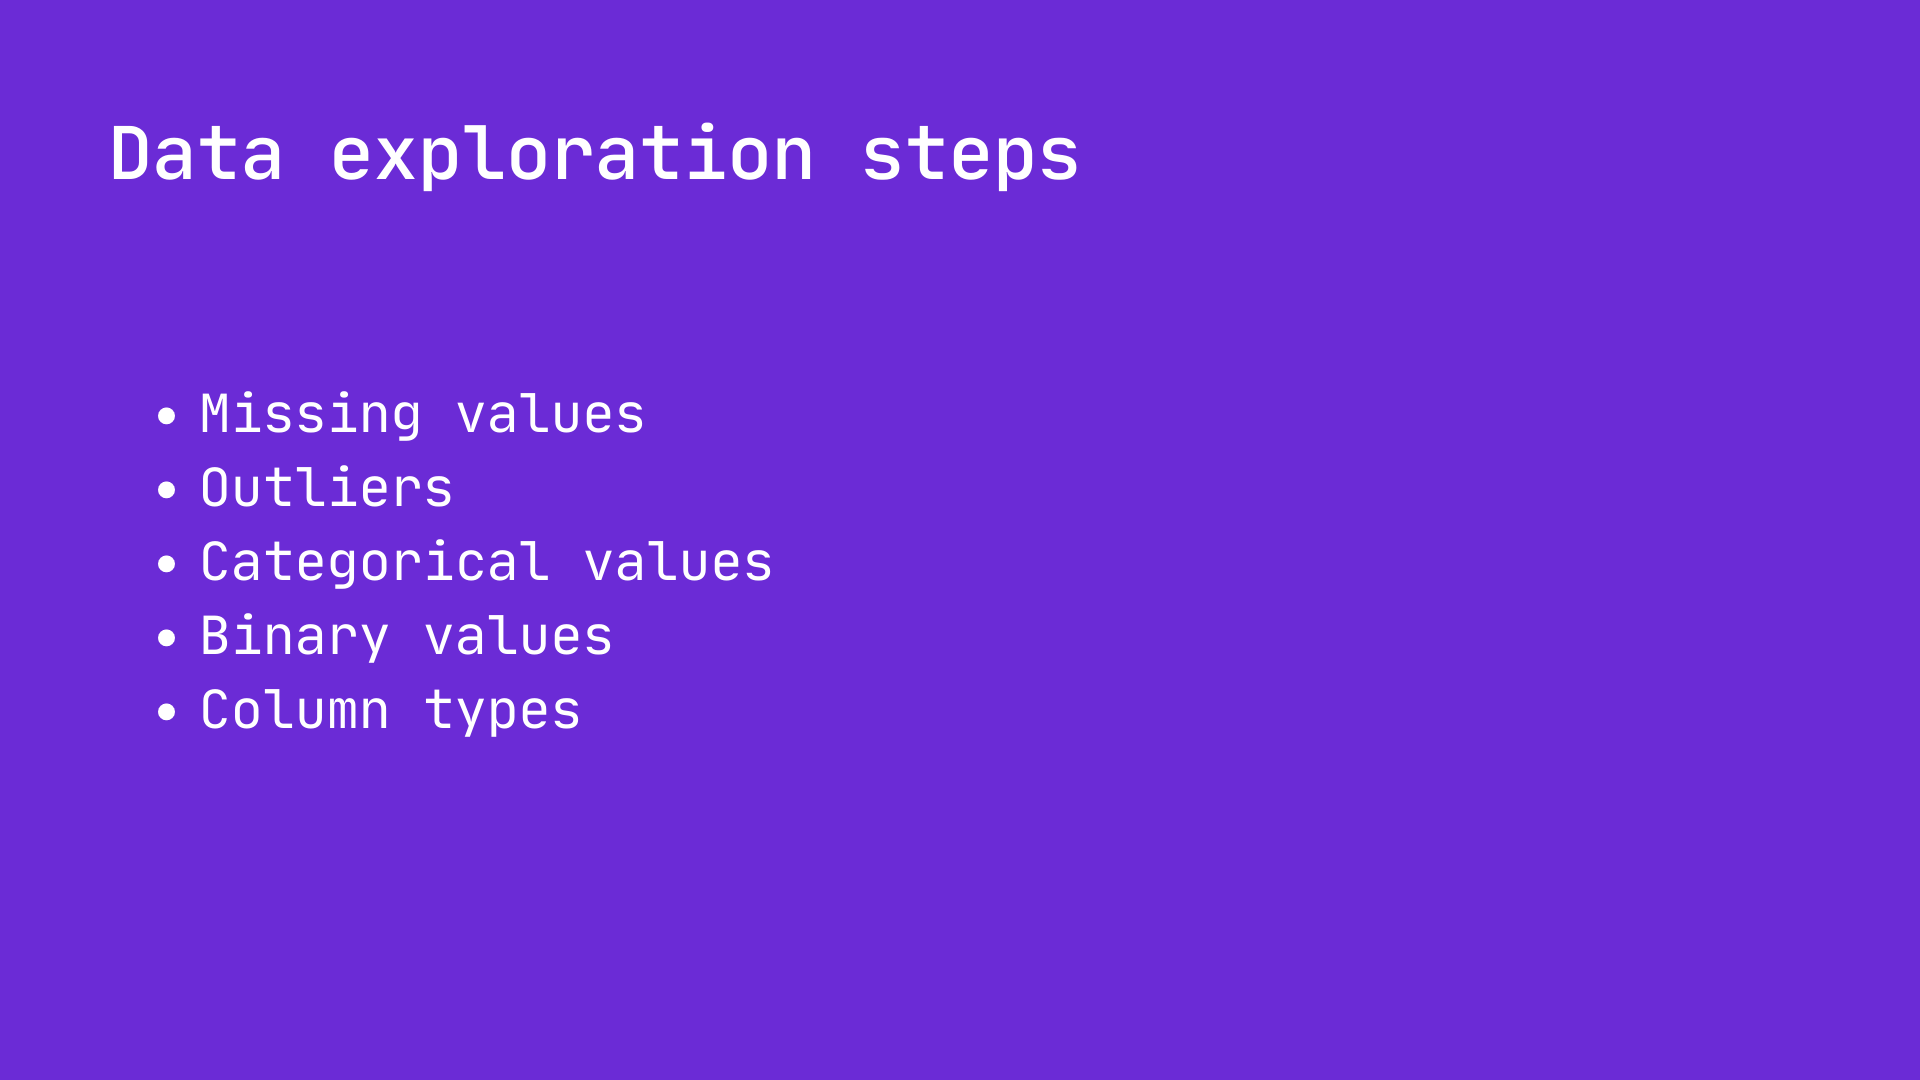

## Things to keep in mind while doing data exploration

* How am I going to clean it?
* What kind of features can I generate?

# Quick cleaning
Many times, when starting a project, you will have an end goal defined. This end goal will determine which column/combination of columns will be your target column.

## Tip #2 - Only keep columns that are helpful for your goal

Target column is what you want to predict for using an ML model.

On top of the target feature, the end model will help you identify redundant columns that you don't need in your analysis.

Before starting with data exploration, it is a good idea to take a look at all the columns with your end goal in mind, and get rid of the ones that you will not use when training your model.

For nowm we will include more than what we need though. Because the extra information will be helpful for data exploration and cleaning.

## Goal: predict the cause of arrival delay

In [5]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'TAIL_NUMBER', 'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT',
       'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'TAXI_OUT',
       'WHEELS_OFF', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'AIR_TIME', 'DISTANCE',
       'WHEELS_ON', 'TAXI_IN', 'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME',
       'ARRIVAL_DELAY', 'DIVERTED', 'CANCELLED', 'CANCELLATION_REASON',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY'],
      dtype='object')

In [6]:
flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'DEPARTURE_TIME', 'DEPARTURE_DELAY',
       'SCHEDULED_ARRIVAL', 'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME',
       'ARRIVAL_DELAY', 'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED', 'CANCELLATION_REASON']]

# 'CANCELLED', 'CANCELLATION_REASON'

In [7]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME            6395
DEPARTURE_DELAY           6395
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME              6852
SCHEDULED_TIME               0
ELAPSED_TIME              7806
ARRIVAL_DELAY             7806
AIR_SYSTEM_DELAY        354479
SECURITY_DELAY          354479
AIRLINE_DELAY           354479
LATE_AIRCRAFT_DELAY     354479
WEATHER_DELAY           354480
CANCELLED                    0
CANCELLATION_REASON    1411253
dtype: int64

In [8]:
flights[flights['ARRIVAL_DELAY'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
4,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
12,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
63,2015,1,1,4,MQ,2962,CLL,DFW,600,NaN,NaN,700,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
67,2015,1,1,4,MQ,3015,DFW,BTR,600,NaN,NaN,718,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
78,2015,1,1,4,MQ,3288,SPS,DFW,605,NaN,NaN,650,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415222,2015,12,31,4,EV,5062,VLD,ATL,615,NaN,NaN,718,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
1415441,2015,12,31,4,EV,5131,CAE,ATL,730,NaN,NaN,843,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
1415536,2015,12,31,4,AS,690,SEA,GEG,800,754.0,-6.0,903,1219.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417438,2015,12,31,4,UA,291,IAD,SMF,1735,1740.0,5.0,2026,2216.0,351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [9]:
na_values = flights[flights['AIR_SYSTEM_DELAY'].isna() & flights['SECURITY_DELAY'].isna() & flights['AIRLINE_DELAY'].isna() & flights['LATE_AIRCRAFT_DELAY'].isna() & flights['WEATHER_DELAY'].isna()]
na_values.shape

(354479, 23)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'FLIGHT_NUMBER'}>,
        <AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>,
        <AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'ELAPSED_TIME'}>],
       [<AxesSubplot:title={'center':'ARRIVAL_DELAY'}>,
        <AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>],
       [<AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>,
        <AxesSubplot:title={'center':'WEATHER_DELAY

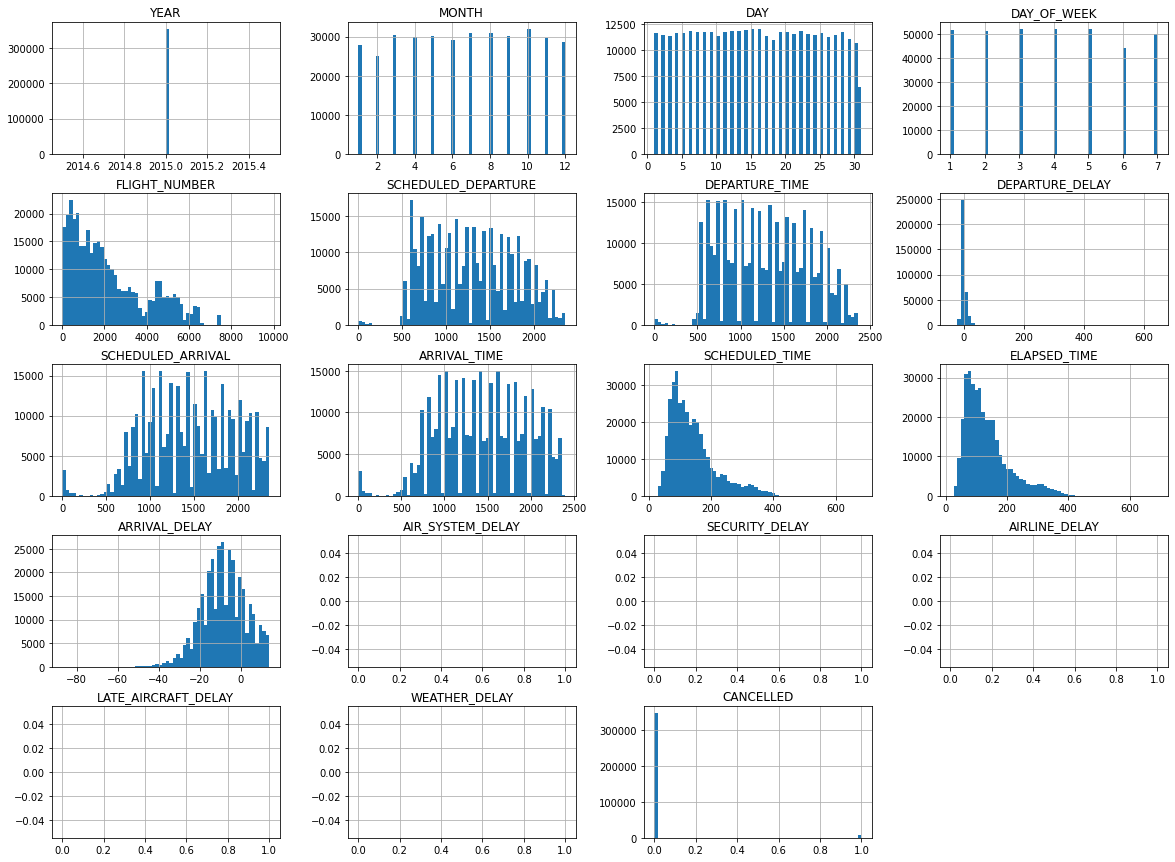

In [10]:
na_values.hist(bins=60, figsize=(20,15))

In [11]:
na_values[na_values['ARRIVAL_DELAY']>15]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON


In [12]:
non_na_values = flights[~flights['AIR_SYSTEM_DELAY'].isna()]
non_na_values.shape


(1063439, 23)

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'FLIGHT_NUMBER'}>,
        <AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>,
        <AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'ELAPSED_TIME'}>],
       [<AxesSubplot:title={'center':'ARRIVAL_DELAY'}>,
        <AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>],
       [<AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>,
        <AxesSubplot:title={'center':'WEATHER_DELAY

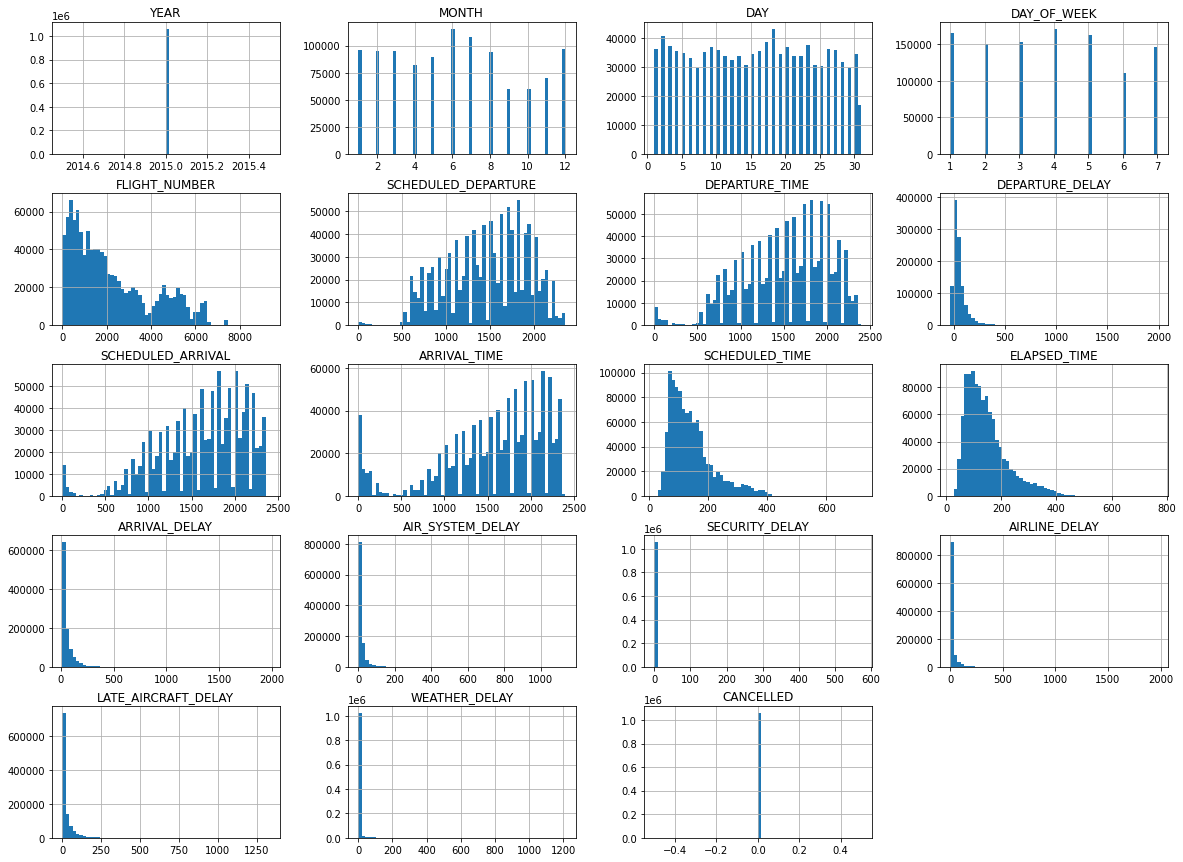

In [13]:
non_na_values.hist(bins=60, figsize=(20,15))

In [14]:
late_flights = flights[flights['ARRIVAL_DELAY']<15]
late_flights.shape

(346673, 23)

In [15]:
late_flights.isna().sum()

YEAR                        0
MONTH                       0
DAY                         0
DAY_OF_WEEK                 0
AIRLINE                     0
FLIGHT_NUMBER               0
ORIGIN_AIRPORT              0
DESTINATION_AIRPORT         0
SCHEDULED_DEPARTURE         0
DEPARTURE_TIME              0
DEPARTURE_DELAY             0
SCHEDULED_ARRIVAL           0
ARRIVAL_TIME                0
SCHEDULED_TIME              0
ELAPSED_TIME                0
ARRIVAL_DELAY               0
AIR_SYSTEM_DELAY       346673
SECURITY_DELAY         346673
AIRLINE_DELAY          346673
LATE_AIRCRAFT_DELAY    346673
WEATHER_DELAY          346673
CANCELLED                   0
CANCELLATION_REASON    346673
dtype: int64

Observation: We assume only flights that are later than 15 mins to arrive to be late.

What about the missing values for ARRIVAL_DELAY?

In [16]:
arrival_na = flights[flights['ARRIVAL_DELAY'].isna()]
arrival_na

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
4,2015,1,1,4,AS,136,ANC,SEA,135,NaN,NaN,600,NaN,205.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,A
12,2015,1,1,4,OO,5254,MAF,IAH,510,NaN,NaN,637,NaN,87.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
63,2015,1,1,4,MQ,2962,CLL,DFW,600,NaN,NaN,700,NaN,60.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
67,2015,1,1,4,MQ,3015,DFW,BTR,600,NaN,NaN,718,NaN,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
78,2015,1,1,4,MQ,3288,SPS,DFW,605,NaN,NaN,650,NaN,45.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1415222,2015,12,31,4,EV,5062,VLD,ATL,615,NaN,NaN,718,NaN,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
1415441,2015,12,31,4,EV,5131,CAE,ATL,730,NaN,NaN,843,NaN,73.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,B
1415536,2015,12,31,4,AS,690,SEA,GEG,800,754.0,-6.0,903,1219.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1417438,2015,12,31,4,UA,291,IAD,SMF,1735,1740.0,5.0,2026,2216.0,351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


In [17]:
arrival_na['CANCELLED'].value_counts()

1    6665
0    1141
Name: CANCELLED, dtype: int64

In [18]:
arrival_na_not_cancelled = arrival_na[arrival_na['CANCELLED']==0]
arrival_na_not_cancelled

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
1344,2015,1,1,4,UA,399,SAN,IAD,1317,1504.0,107.0,2105,119.0,288.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1634,2015,1,1,4,OO,5488,IAH,ASE,1427,1436.0,9.0,1619,NaN,172.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
4995,2015,1,2,5,MQ,2903,DFW,BTR,1005,1002.0,-3.0,1123,1423.0,78.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
5104,2015,1,2,5,OO,5312,ORD,CMX,1025,1037.0,12.0,1248,1438.0,83.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
7001,2015,1,2,5,UA,73,SFO,HNL,1610,1719.0,69.0,1944,31.0,334.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1402546,2015,12,29,2,OO,5669,DEN,SUN,1115,1111.0,-4.0,1315,NaN,120.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1404111,2015,12,29,2,OO,2958,PHX,TUS,1455,1502.0,7.0,1547,1744.0,52.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1412925,2015,12,30,3,VX,367,BOS,LAX,1745,1758.0,13.0,2120,2234.0,395.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN
1415536,2015,12,31,4,AS,690,SEA,GEG,800,754.0,-6.0,903,1219.0,63.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN


We can calculate the arrival_delay but we do not know what the reason for the delay is.
The missing information is only 2%.

In [19]:
arrival_na_not_cancelled[arrival_na_not_cancelled['ARRIVAL_TIME'].isna()].shape


(187, 23)

## Tip #3 - as you do exploration, note down what actions to take for cleaning

# Steps to take

1. Remove rows where the arrival delay is missing (most of them are cancelled flights)
2. Fill in nan values for delay reasons with zeros

In [20]:
flights.shape

(1417918, 23)

In [21]:
flights = flights[~flights['ARRIVAL_DELAY'].isna()]
flights.shape

(1410112, 23)

In [22]:
flights[flights['SCHEDULED_TIME'].isna()]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON


In [23]:
flights.isna().sum()

YEAR                         0
MONTH                        0
DAY                          0
DAY_OF_WEEK                  0
AIRLINE                      0
FLIGHT_NUMBER                0
ORIGIN_AIRPORT               0
DESTINATION_AIRPORT          0
SCHEDULED_DEPARTURE          0
DEPARTURE_TIME               0
DEPARTURE_DELAY              0
SCHEDULED_ARRIVAL            0
ARRIVAL_TIME                 0
SCHEDULED_TIME               0
ELAPSED_TIME                 0
ARRIVAL_DELAY                0
AIR_SYSTEM_DELAY        346673
SECURITY_DELAY          346673
AIRLINE_DELAY           346673
LATE_AIRCRAFT_DELAY     346673
WEATHER_DELAY           346674
CANCELLED                    0
CANCELLATION_REASON    1410112
dtype: int64

In [24]:
flights = flights.fillna(0)

In [25]:
flights.isna().sum()

YEAR                   0
MONTH                  0
DAY                    0
DAY_OF_WEEK            0
AIRLINE                0
FLIGHT_NUMBER          0
ORIGIN_AIRPORT         0
DESTINATION_AIRPORT    0
SCHEDULED_DEPARTURE    0
DEPARTURE_TIME         0
DEPARTURE_DELAY        0
SCHEDULED_ARRIVAL      0
ARRIVAL_TIME           0
SCHEDULED_TIME         0
ELAPSED_TIME           0
ARRIVAL_DELAY          0
AIR_SYSTEM_DELAY       0
SECURITY_DELAY         0
AIRLINE_DELAY          0
LATE_AIRCRAFT_DELAY    0
WEATHER_DELAY          0
CANCELLED              0
CANCELLATION_REASON    0
dtype: int64

In [26]:
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
0,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,711,656.0,221.0,203.0,-15.0,0.0,0.0,0.0,0.0,0.0,0,0
1,2015,1,1,4,NK,597,MSP,FLL,115,127.0,12.0,542,607.0,207.0,220.0,25.0,25.0,0.0,0.0,0.0,0.0,0,0
2,2015,1,1,4,US,413,LAS,CLT,120,110.0,-10.0,825,754.0,245.0,224.0,-31.0,0.0,0.0,0.0,0.0,0.0,0,0
3,2015,1,1,4,NK,168,PHX,ORD,125,237.0,72.0,549,632.0,204.0,175.0,43.0,43.0,0.0,0.0,0.0,0.0,0,0
5,2015,1,1,4,NK,298,LAS,IAH,144,140.0,-4.0,634,630.0,170.0,170.0,-4.0,0.0,0.0,0.0,0.0,0.0,0,0


In [27]:
# flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
#        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
#        'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].apply(pd.to_numeric)

In [28]:
# flights.dtypes

# Data exploration
One of the most fun parts of data preparation is visualizing the data to find imperfections. 

## Tip #4 - Visualize your data to explore it

Histograms are a great way to take a first look at your data.

A histogram will show the amount of times (y-axis) a certain value (x-axis) has occurred in the data. The span of the x-axis includes all the values. So when you see a histogram where, seemingly, only one value (e.g. 0) is represented, yet the x-axis spans until 100, this means there are some values that are around 100. Only that their occurrence is so low that in the graph they are invisible.

This might point to some outliers and tells us that we need to take a closer look at these columns.

array([[<AxesSubplot:title={'center':'YEAR'}>,
        <AxesSubplot:title={'center':'MONTH'}>,
        <AxesSubplot:title={'center':'DAY'}>,
        <AxesSubplot:title={'center':'DAY_OF_WEEK'}>],
       [<AxesSubplot:title={'center':'FLIGHT_NUMBER'}>,
        <AxesSubplot:title={'center':'SCHEDULED_DEPARTURE'}>,
        <AxesSubplot:title={'center':'DEPARTURE_TIME'}>,
        <AxesSubplot:title={'center':'DEPARTURE_DELAY'}>],
       [<AxesSubplot:title={'center':'SCHEDULED_ARRIVAL'}>,
        <AxesSubplot:title={'center':'ARRIVAL_TIME'}>,
        <AxesSubplot:title={'center':'SCHEDULED_TIME'}>,
        <AxesSubplot:title={'center':'ELAPSED_TIME'}>],
       [<AxesSubplot:title={'center':'ARRIVAL_DELAY'}>,
        <AxesSubplot:title={'center':'AIR_SYSTEM_DELAY'}>,
        <AxesSubplot:title={'center':'SECURITY_DELAY'}>,
        <AxesSubplot:title={'center':'AIRLINE_DELAY'}>],
       [<AxesSubplot:title={'center':'LATE_AIRCRAFT_DELAY'}>,
        <AxesSubplot:title={'center':'WEATHER_DELAY

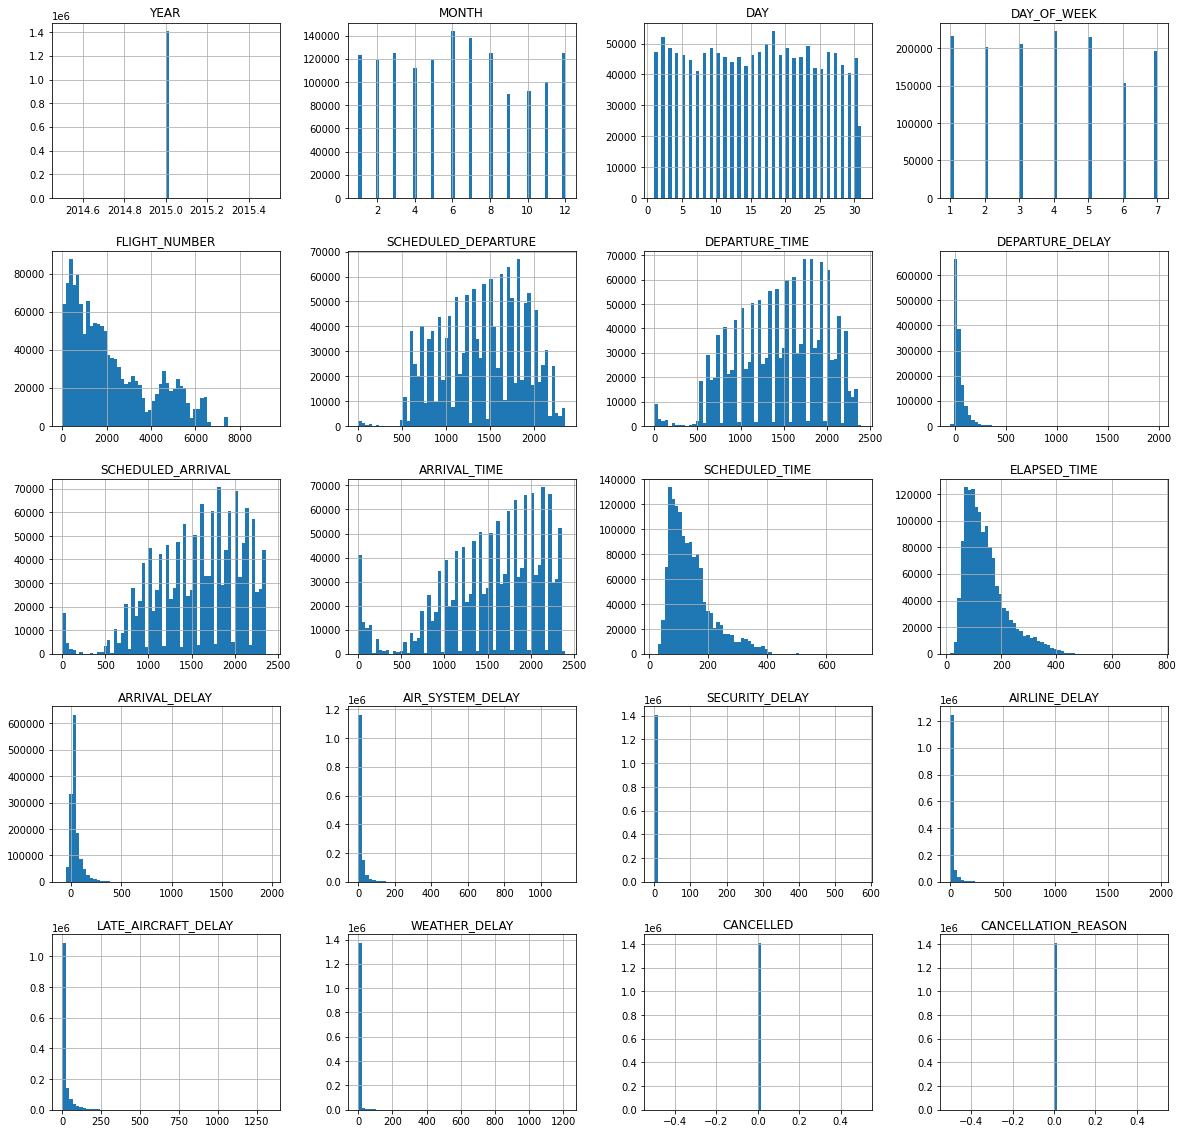

In [29]:
flights.hist(bins=60, figsize=(20,20))

In [30]:
flights[flights['ARRIVAL_DELAY']>1500]

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON
82604,2015,1,18,7,AA,224,LAS,LAX,1130,1414.0,1604.0,1246,1519.0,76.0,65.0,1593.0,0.0,0.0,1593.0,0.0,0.0,0,0
97393,2015,1,23,5,AA,1322,BHM,DFW,700,1608.0,1988.0,914,1805.0,134.0,117.0,1971.0,0.0,0.0,1971.0,0.0,0.0,0,0
110041,2015,1,27,2,AA,1242,FAT,DFW,659,850.0,1551.0,1210,1356.0,191.0,186.0,1546.0,0.0,0.0,1546.0,0.0,0.0,0,0
240579,2015,2,28,6,AA,1312,STL,MIA,620,847.0,1587.0,1008,1315.0,168.0,208.0,1627.0,40.0,0.0,1587.0,0.0,0.0,0,0
263782,2015,3,4,3,AA,270,HNL,LAX,828,1057.0,1589.0,1555,1811.0,327.0,314.0,1576.0,0.0,0.0,1576.0,0.0,0.0,0,0
289560,2015,3,10,2,AA,1594,SAT,DFW,850,1047.0,1557.0,1000,1154.0,70.0,67.0,1554.0,0.0,0.0,1554.0,0.0,0.0,0,0
341605,2015,3,24,2,AA,1279,OMA,DFW,1103,1352.0,1609.0,1255,1533.0,112.0,101.0,1598.0,0.0,0.0,1563.0,35.0,0.0,0,0
343865,2015,3,25,3,AA,1126,SMF,DFW,625,748.0,1523.0,1149,1303.0,204.0,195.0,1514.0,0.0,0.0,1514.0,0.0,0.0,0,0
474173,2015,4,28,2,AA,94,SAN,JFK,745,927.0,1542.0,1615,1809.0,330.0,342.0,1554.0,12.0,0.0,838.0,704.0,0.0,0,0
702863,2015,6,22,1,AA,96,RIC,DFW,715,837.0,1522.0,920,1028.0,185.0,171.0,1508.0,0.0,0.0,1508.0,0.0,0.0,0,0


In [31]:
flights.dtypes

YEAR                     int64
MONTH                    int64
DAY                      int64
DAY_OF_WEEK              int64
AIRLINE                 object
FLIGHT_NUMBER            int64
ORIGIN_AIRPORT          object
DESTINATION_AIRPORT     object
SCHEDULED_DEPARTURE      int64
DEPARTURE_TIME         float64
DEPARTURE_DELAY        float64
SCHEDULED_ARRIVAL        int64
ARRIVAL_TIME           float64
SCHEDULED_TIME         float64
ELAPSED_TIME           float64
ARRIVAL_DELAY          float64
AIR_SYSTEM_DELAY       float64
SECURITY_DELAY         float64
AIRLINE_DELAY          float64
LATE_AIRCRAFT_DELAY    float64
WEATHER_DELAY          float64
CANCELLED                int64
CANCELLATION_REASON      int64
dtype: object

Sometimes there are problems with the data we might not see. One way to figure it out is to look at the types of the columns. If we know a column should be float but it is specific as object (aka string), it is an indication that there is something wrong with it.

Let's see what exactly is wrong by trying to convert it to a numeric column.

In [32]:
flights['SECURITY_DELAY'] = pd.to_numeric(flights['SECURITY_DELAY'])

In [33]:
flights.iloc[2973]

YEAR                     2015
MONTH                       1
DAY                         1
DAY_OF_WEEK                 4
AIRLINE                    WN
FLIGHT_NUMBER             174
ORIGIN_AIRPORT            ROC
DESTINATION_AIRPORT       MDW
SCHEDULED_DEPARTURE      1900
DEPARTURE_TIME         1912.0
DEPARTURE_DELAY          12.0
SCHEDULED_ARRIVAL        2005
ARRIVAL_TIME           2019.0
SCHEDULED_TIME          125.0
ELAPSED_TIME            127.0
ARRIVAL_DELAY            14.0
AIR_SYSTEM_DELAY          0.0
SECURITY_DELAY            0.0
AIRLINE_DELAY             0.0
LATE_AIRCRAFT_DELAY       0.0
WEATHER_DELAY             0.0
CANCELLED                   0
CANCELLATION_REASON         0
Name: 3015, dtype: object

Here we are making sure that the airline and flight number columns have a good distribution. If only a couple of airlines/flight numbers are represented heavily in the data and other not many times, it will not serve us well to include this information in the model training.

It is also good to take a look at the distribution of categorical values to make sure there aren't any values that look like they don't belong.

## Tip #5 - make sure categorical values are clean


We don't need to include the flight number because it is represented with: airline name, rotue and time of flight.

<AxesSubplot:xlabel='AIRLINE'>

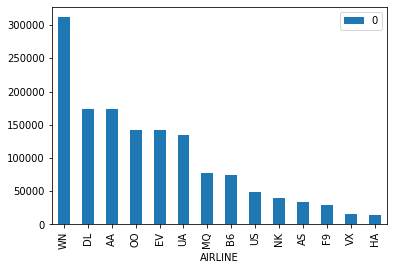

In [34]:
pd.DataFrame(flights.value_counts("AIRLINE")).plot(kind='bar')



# Preparing the target feature

Sometimes, based on our end-goal, we need to combine multiple columns to create the target feature. For this problem we are looking for the type of delay that caused the main delay for this flight.

This way, we are setting up this problem as a classification problem.

In [35]:
flights['all_delay'] = flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].sum(axis=1)
flights.head()

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON,all_delay
0,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,711,656.0,221.0,203.0,-15.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
1,2015,1,1,4,NK,597,MSP,FLL,115,127.0,12.0,542,607.0,207.0,220.0,25.0,25.0,0.0,0.0,0.0,0.0,0,0,25.0
2,2015,1,1,4,US,413,LAS,CLT,120,110.0,-10.0,825,754.0,245.0,224.0,-31.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0
3,2015,1,1,4,NK,168,PHX,ORD,125,237.0,72.0,549,632.0,204.0,175.0,43.0,43.0,0.0,0.0,0.0,0.0,0,0,43.0
5,2015,1,1,4,NK,298,LAS,IAH,144,140.0,-4.0,634,630.0,170.0,170.0,-4.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0


In [36]:
flights['delay_reason'] = np.where(flights['all_delay']>0, flights[['AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY','LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY']].idxmax(axis=1), 'NO_DELAY')

It's always a good idea to check your data after making big changes to make sure everything went well.

In [37]:
flights

,YEAR,MONTH,DAY,DAY_OF_WEEK,AIRLINE,FLIGHT_NUMBER,ORIGIN_AIRPORT,DESTINATION_AIRPORT,SCHEDULED_DEPARTURE,DEPARTURE_TIME,DEPARTURE_DELAY,SCHEDULED_ARRIVAL,ARRIVAL_TIME,SCHEDULED_TIME,ELAPSED_TIME,ARRIVAL_DELAY,AIR_SYSTEM_DELAY,SECURITY_DELAY,AIRLINE_DELAY,LATE_AIRCRAFT_DELAY,WEATHER_DELAY,CANCELLED,CANCELLATION_REASON,all_delay,delay_reason
0,2015,1,1,4,DL,1173,LAS,ATL,30,33.0,3.0,711,656.0,221.0,203.0,-15.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
1,2015,1,1,4,NK,597,MSP,FLL,115,127.0,12.0,542,607.0,207.0,220.0,25.0,25.0,0.0,0.0,0.0,0.0,0,0,25.0,AIR_SYSTEM_DELAY
2,2015,1,1,4,US,413,LAS,CLT,120,110.0,-10.0,825,754.0,245.0,224.0,-31.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
3,2015,1,1,4,NK,168,PHX,ORD,125,237.0,72.0,549,632.0,204.0,175.0,43.0,43.0,0.0,0.0,0.0,0.0,0,0,43.0,AIR_SYSTEM_DELAY
5,2015,1,1,4,NK,298,LAS,IAH,144,140.0,-4.0,634,630.0,170.0,170.0,-4.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1417913,2015,12,31,4,AS,28,SEA,MSP,2355,11.0,16.0,507,535.0,192.0,204.0,28.0,12.0,0.0,16.0,0.0,0.0,0,0,28.0,AIRLINE_DELAY
1417914,2015,12,31,4,AS,850,KOA,SEA,2355,2352.0,-3.0,750,712.0,355.0,320.0,-38.0,0.0,0.0,0.0,0.0,0.0,0,0,0.0,NO_DELAY
1417915,2015,12,31,4,NK,371,FLL,BQN,2358,11.0,13.0,318,346.0,140.0,155.0,28.0,15.0,0.0,13.0,0.0,0.0,0,0,28.0,AIR_SYSTEM_DELAY
1417916,2015,12,31,4,B6,1248,LAS,JFK,2359,238.0,159.0,741,1020.0,282.0,282.0,159.0,0.0,0.0,159.0,0.0,0.0,0,0,159.0,AIRLINE_DELAY


In [38]:
flights['delay_reason'].value_counts()

LATE_AIRCRAFT_DELAY    410647
NO_DELAY               346673
AIRLINE_DELAY          311386
AIR_SYSTEM_DELAY       303784
WEATHER_DELAY           35711
SECURITY_DELAY           1911
Name: delay_reason, dtype: int64

<AxesSubplot:>

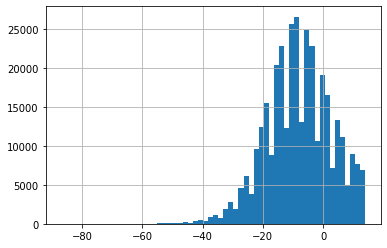

In [39]:
flights[flights['delay_reason'] == 'NO_DELAY']['ARRIVAL_DELAY'].hist(bins=60)

In [40]:
flights.columns

Index(['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'FLIGHT_NUMBER',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE',
       'DEPARTURE_TIME', 'DEPARTURE_DELAY', 'SCHEDULED_ARRIVAL',
       'ARRIVAL_TIME', 'SCHEDULED_TIME', 'ELAPSED_TIME', 'ARRIVAL_DELAY',
       'AIR_SYSTEM_DELAY', 'SECURITY_DELAY', 'AIRLINE_DELAY',
       'LATE_AIRCRAFT_DELAY', 'WEATHER_DELAY', 'CANCELLED',
       'CANCELLATION_REASON', 'all_delay', 'delay_reason'],
      dtype='object')

In [41]:
training_data = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE',
       'ORIGIN_AIRPORT', 'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE', 'delay_reason']]

In [42]:
training_data.dtypes

YEAR                    int64
MONTH                   int64
DAY                     int64
DAY_OF_WEEK             int64
AIRLINE                object
ORIGIN_AIRPORT         object
DESTINATION_AIRPORT    object
SCHEDULED_DEPARTURE     int64
delay_reason           object
dtype: object

In [43]:
X_flights = flights[['YEAR', 'MONTH', 'DAY', 'DAY_OF_WEEK', 'AIRLINE', 'ORIGIN_AIRPORT',
       'DESTINATION_AIRPORT', 'SCHEDULED_DEPARTURE']]
X_flights = pd.get_dummies(X_flights)
y_flights = flights[['delay_reason']]
# y_flights = pd.get_dummies(y_flights)

# Model training with Scikit-learn

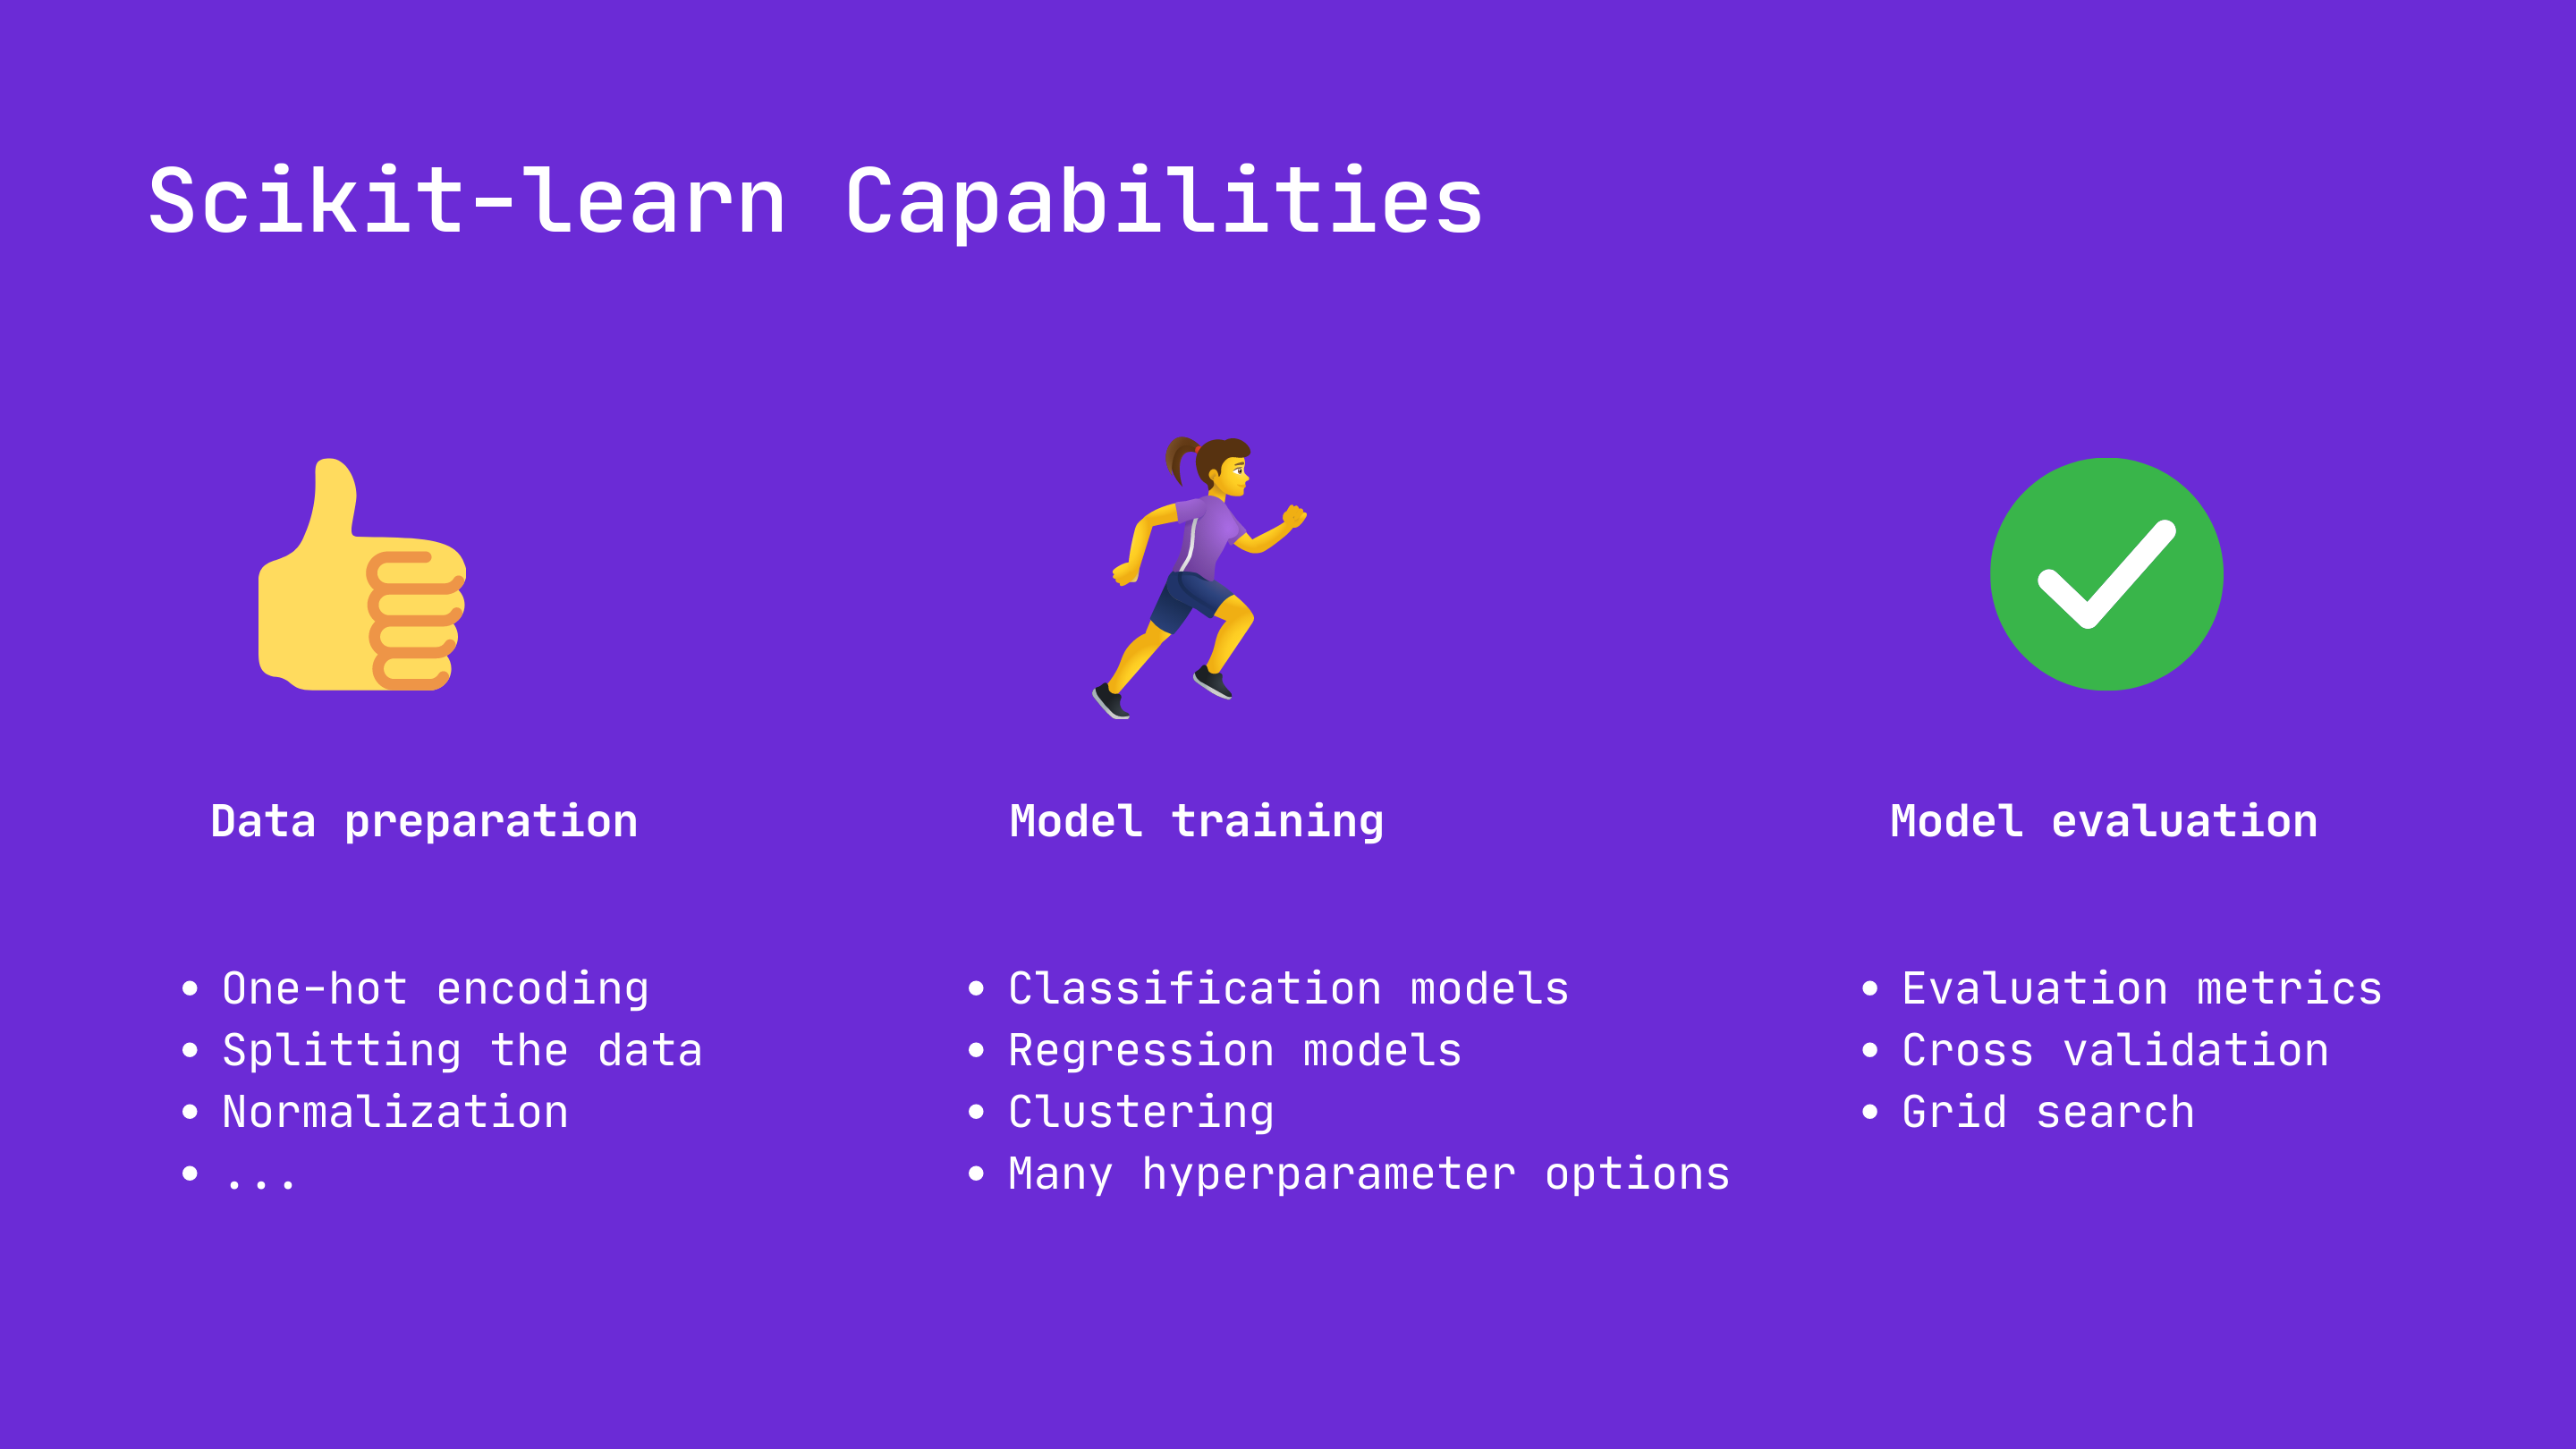

# Importing data

In [54]:
# https://scikit-learn.org/stable/datasets/toy_dataset.html

from sklearn.datasets import load_iris
data = load_iris()

# https://scikit-learn.org/stable/datasets/real_world.html

from sklearn.datasets import fetch_20newsgroups
newsgroups_train = fetch_20newsgroups()

In [56]:
newsgroups_train

{'data': ["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
  "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washingto

# Splitting into train and test datasets

In [44]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_flights, y_flights, test_size=0.30, random_state=15)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.15, random_state=15)

X_train, X_validation, y_train, y_validation = train_test_split(X_train, y_train, test_size=0.20, random_state=15)

## Dealing with unbalanced data

In [ ]:
# !pip install imbalanced-learn
# !conda install -c conda-forge imbalanced-learn

In [45]:
y_train.value_counts()

delay_reason       
LATE_AIRCRAFT_DELAY    14605
NO_DELAY               12096
AIRLINE_DELAY          11052
AIR_SYSTEM_DELAY       10920
WEATHER_DELAY           1254
SECURITY_DELAY            73
dtype: int64

In [46]:
from imblearn.over_sampling import RandomOverSampler

ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

In [47]:
y_resampled.value_counts()

delay_reason       
AIRLINE_DELAY          14605
AIR_SYSTEM_DELAY       14605
LATE_AIRCRAFT_DELAY    14605
NO_DELAY               14605
SECURITY_DELAY         14605
WEATHER_DELAY          14605
dtype: int64

# Training

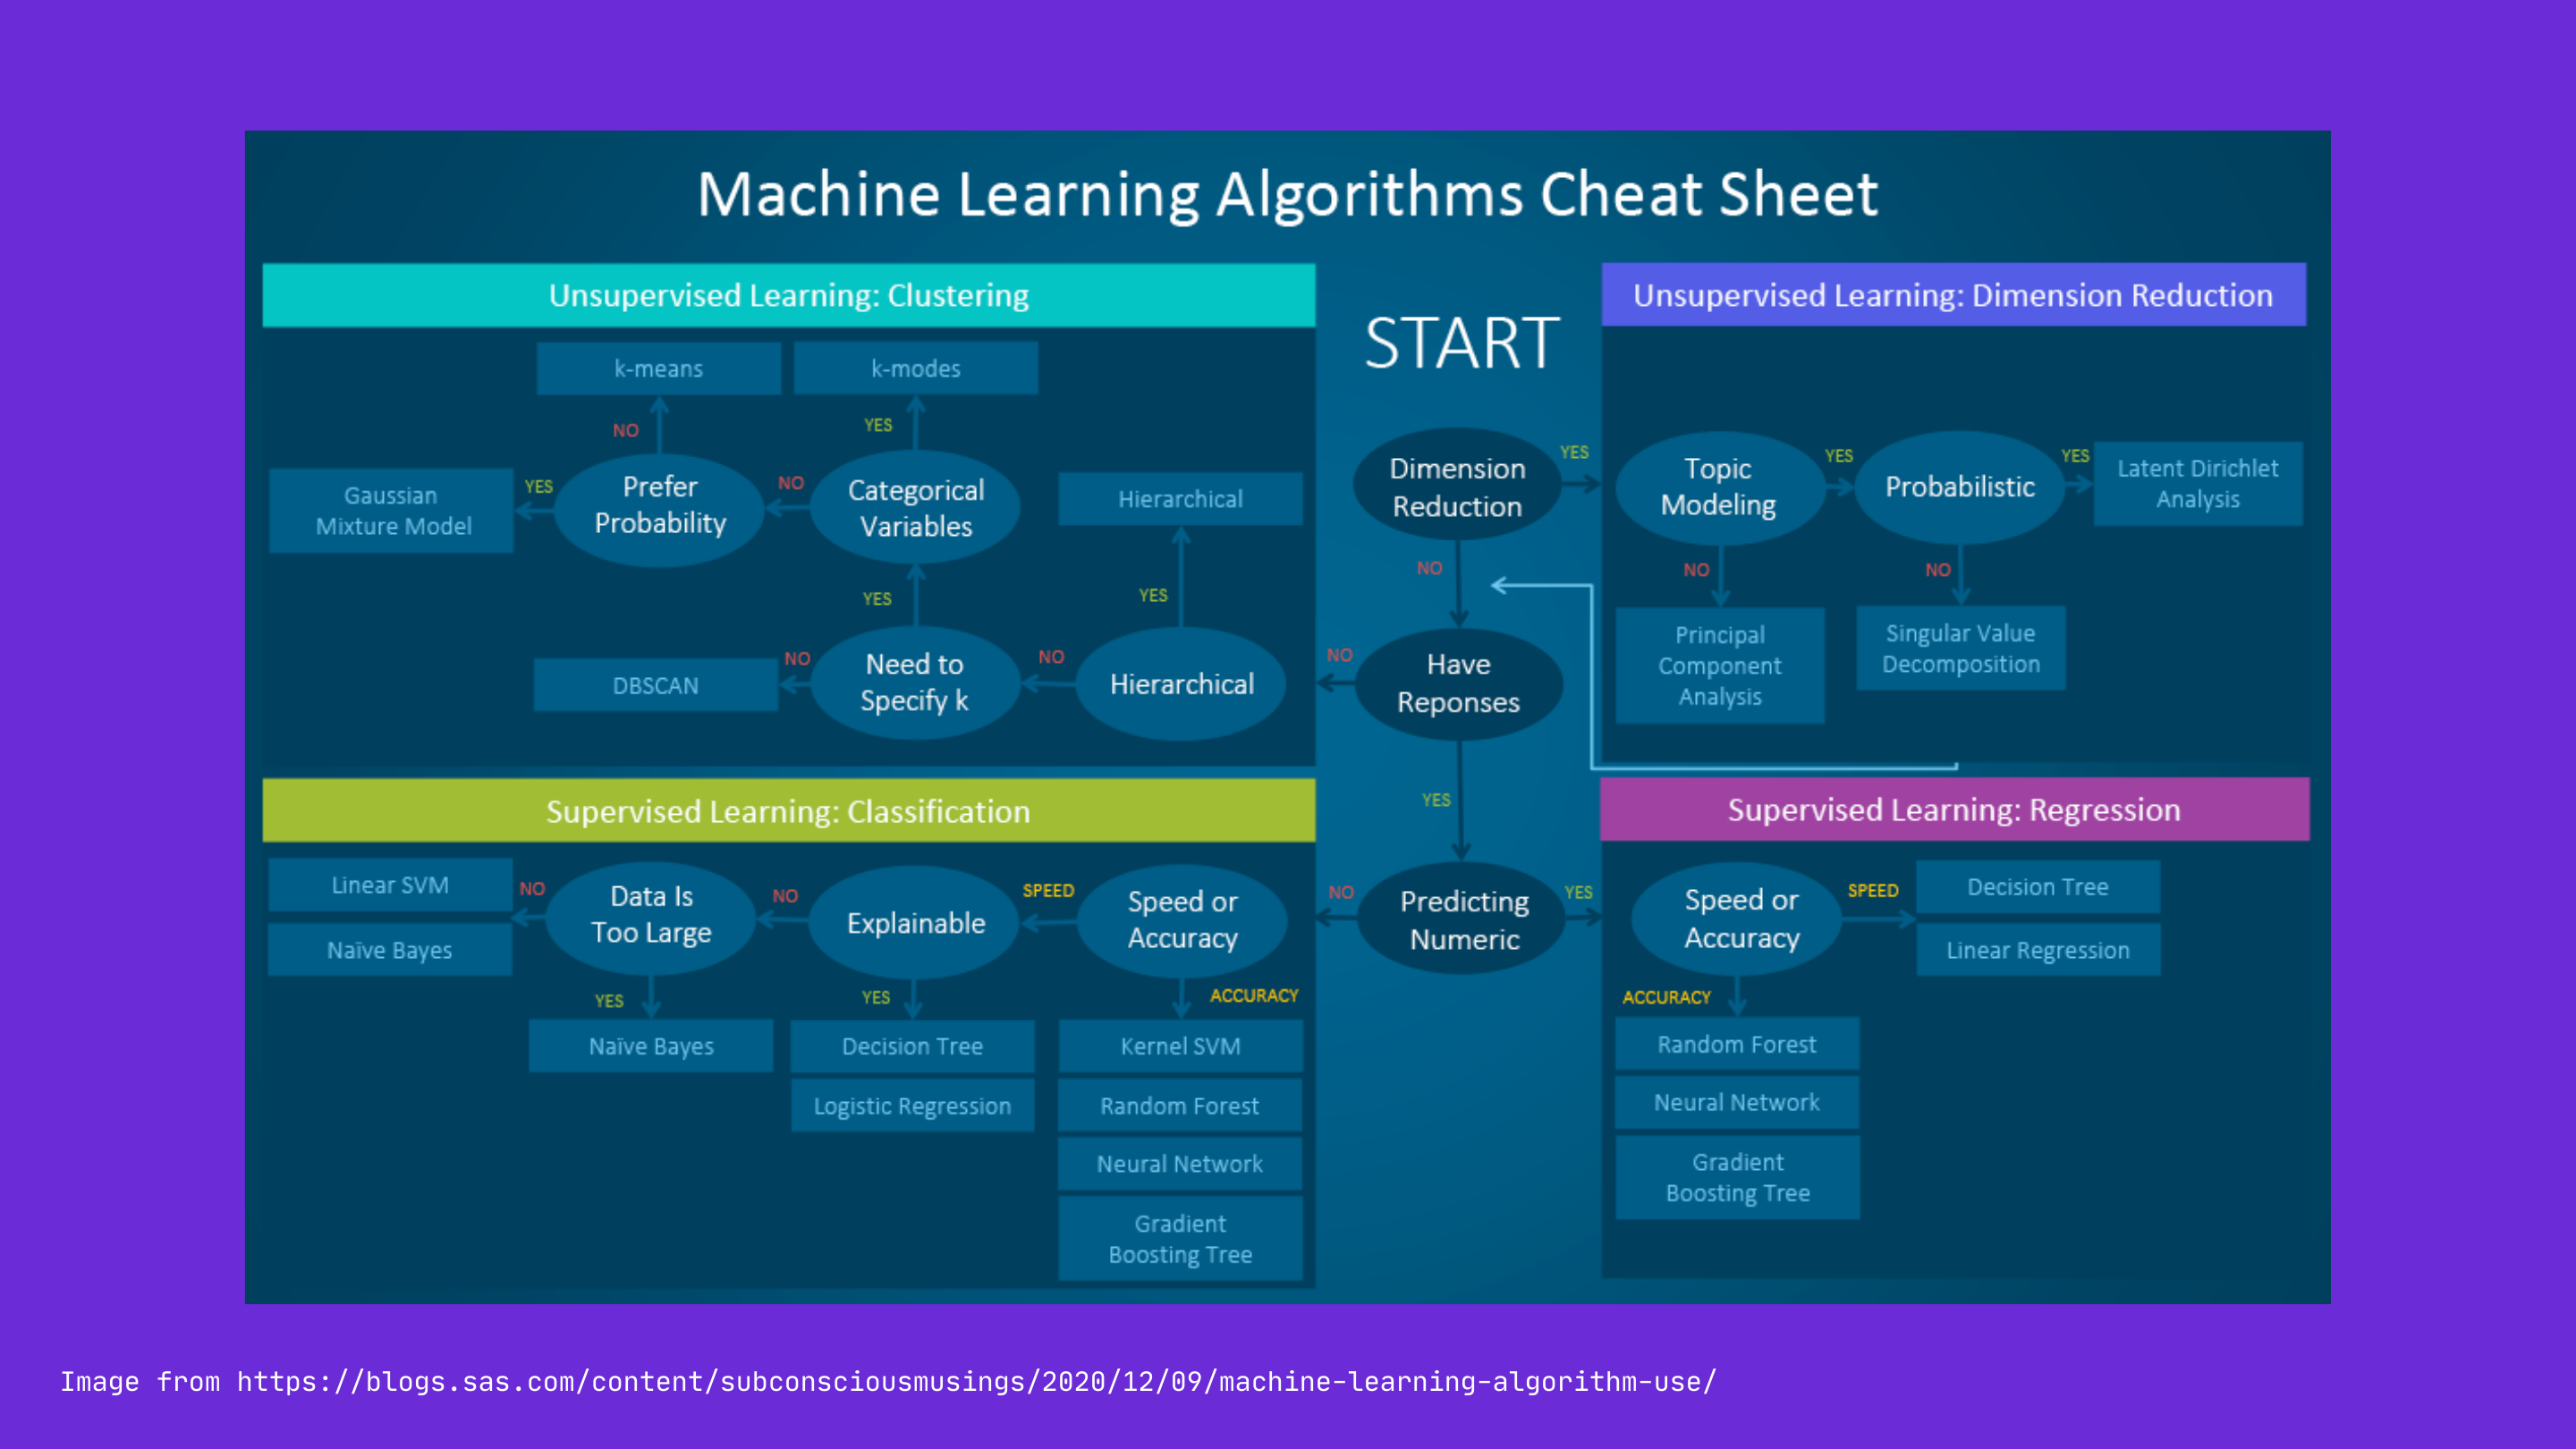

In [54]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier().fit(X_train, y_train)

In [55]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'AIR_SYSTEM_DELAY', 'NO_DELAY', ...,
       'AIR_SYSTEM_DELAY', 'AIR_SYSTEM_DELAY', 'NO_DELAY'], dtype=object)

In [56]:
clf.score(X_test, y_test)

0.37848730834873795

# Evaluation


In [57]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)


In [58]:
cm

array([[27025, 16072, 24155, 24182,   117,  1754],
       [15965, 35944, 19541, 17219,   134,  2209],
       [23568, 19294, 55096, 22491,   122,  2540],
       [23051, 17094, 23172, 39607,   138,  1387],
       [  164,    89,   112,   132,    39,    13],
       [ 1720,  2488,  2545,  1441,    12,  2402]])

<AxesSubplot:>

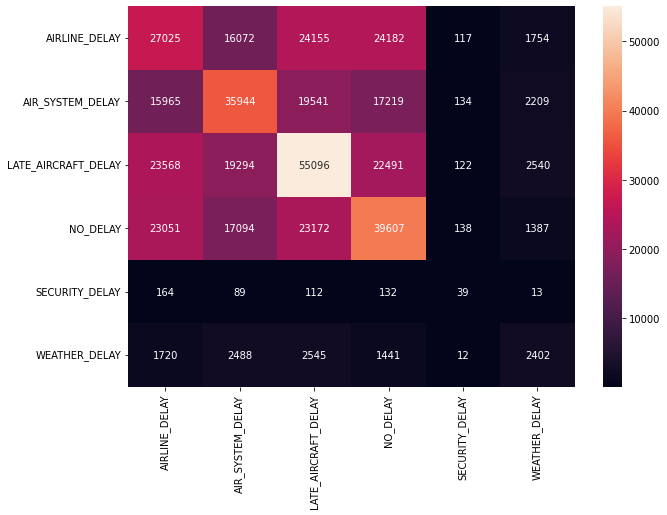

In [59]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize = (10,7))
sns.heatmap(cm, annot=True, fmt='g', xticklabels=clf.classes_, yticklabels=clf.classes_)

In [60]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.30      0.29      0.29     93305
   AIR_SYSTEM_DELAY       0.40      0.39      0.40     91012
LATE_AIRCRAFT_DELAY       0.44      0.45      0.44    123111
           NO_DELAY       0.38      0.38      0.38    104449
     SECURITY_DELAY       0.07      0.07      0.07       549
      WEATHER_DELAY       0.23      0.23      0.23     10608

           accuracy                           0.38    423034
          macro avg       0.30      0.30      0.30    423034
       weighted avg       0.38      0.38      0.38    423034



# Grid search

In [62]:
from sklearn.model_selection import GridSearchCV
from sklearn import svm

parameters = {'max_depth':[10,15], 'max_features':["sqrt", "log2"]}
tree = DecisionTreeClassifier()
clf = GridSearchCV(tree, parameters)
clf.fit(X_train, y_train)

GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [10, 15],
                         'max_features': ['sqrt', 'log2']})

In [64]:
y_pred = clf.predict(X_test)
y_pred

array(['LATE_AIRCRAFT_DELAY', 'NO_DELAY', 'LATE_AIRCRAFT_DELAY', ...,
       'LATE_AIRCRAFT_DELAY', 'LATE_AIRCRAFT_DELAY',
       'LATE_AIRCRAFT_DELAY'], dtype=object)

In [67]:
print(classification_report(y_test, y_pred))

                     precision    recall  f1-score   support

      AIRLINE_DELAY       0.24      0.02      0.04     93305
   AIR_SYSTEM_DELAY       0.30      0.06      0.09     91012
LATE_AIRCRAFT_DELAY       0.36      0.80      0.50    123111
           NO_DELAY       0.34      0.41      0.37    104449
     SECURITY_DELAY       0.00      0.00      0.00       549
      WEATHER_DELAY       0.02      0.00      0.00     10608

           accuracy                           0.35    423034
          macro avg       0.21      0.21      0.17    423034
       weighted avg       0.31      0.35      0.27    423034



# Or just use cross validation

In [48]:
from sklearn.model_selection import cross_val_score

In [52]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier(random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)

array([0.316, 0.32 , 0.326, 0.267, 0.226, 0.28 , 0.339, 0.36 , 0.329,
       0.296])

In [ ]:
clf = RandomForestClassifier(n_estimators=50, max_depth=5, random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)

In [ ]:
clf = RandomForestClassifier(n_estimators=200, random_state=0)
cross_val_score(clf, X_flights, y_flights, cv=10)